In [2]:
import pandas as pd
import numpy as np
import datetime 
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import category_encoders as ce

pd.set_option('display.max_columns', None)
import warnings 
warnings.filterwarnings('ignore')

In [259]:
df = pd.read_csv('C:/Users/seanl/OneDrive/Desktop/final_project/hockey_forecast/tables/good_tables/2016-17_skaters_2.csv')
df1 = pd.read_csv('C:/Users/seanl/OneDrive/Desktop/final_project/hockey_forecast/tables/good_tables/2017-18_skaters_2.csv')
df2 = pd.read_csv('C:/Users/seanl/OneDrive/Desktop/final_project/hockey_forecast/tables/good_tables/2018-19_skaters_2.csv')
df3 = pd.read_csv('C:/Users/seanl/OneDrive/Desktop/final_project/hockey_forecast/tables/good_tables/2019-20_skaters_2.csv')
df4 = pd.read_csv('C:/Users/seanl/OneDrive/Desktop/final_project/hockey_forecast/tables/good_tables/2020-21_skaters_2.csv')

test = pd.read_csv('C:/Users/seanl/OneDrive/Desktop/final_project/hockey_forecast/tables/good_tables/2021-22_skaters_2.csv')

data = pd.read_csv('C:/Users/seanl/OneDrive/Desktop/final_project/hockey_forecast/tables/good_tables/big_skaters.csv')

test = pd.read_csv('C:/Users/seanl/OneDrive/Desktop/final_project/hockey_forecast/tables/good_tables/2021-22_skaters_2.csv')

# Data stuff

In [248]:
#data = data.drop(columns=['Unnamed: 0'])
data

,Unnamed: 0,index,Player,Age,Team,Position,Games Played,Goals,Assists,PTS,+/-,PIM,PPG,SHG,GWG,Shots,S%,TOI,BLK,HIT,Season,Pts per Game,P/60,Avg TOI
0,0,1,Justin Abdelkader\abdelju01,29,DET,LW,64,7,14,21,-20,50,5,0,1,104,6.7,1066,27.0,144,0,0.328,1.182,16.656
1,1,2,Pontus Aberg\abergpo01,23,NSH,LW,15,1,1,2,-2,4,0,0,0,12,8.3,185,2.0,9,0,0.133,0.649,12.333
2,2,3,Noel Acciari\acciano01,25,BOS,C,29,2,3,5,3,16,0,0,0,24,8.3,301,5.0,80,0,0.172,0.997,10.379
3,3,5,Sebastian Aho\ahose01,19,CAR,RW,82,24,25,49,-1,26,6,1,4,214,11.2,1377,14.0,51,0,0.598,2.135,16.793
4,4,6,Karl Alzner\alzneka01,28,WSH,D,82,3,10,13,23,28,0,0,0,81,3.7,1623,162.0,105,0,0.159,0.481,19.793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3721,3721,907,Trevor Zegras\zegratr01,19,ANA,C,24,3,10,13,6,12,0,0,0,53,5.7,370,4.0,7,4,0.542,2.108,15.417
3722,3722,908,Mika Zibanejad\zibanmi01,27,NYR,C,56,24,26,50,2,18,10,2,7,171,14.0,1126,44.0,75,4,0.893,2.664,20.107
3723,3723,910,Artem Zub\zubar01,25,OTT,D,47,3,11,14,4,26,0,0,1,39,7.7,864,70.0,89,4,0.298,0.972,18.383
3724,3724,911,Mats Zuccarello\zuccama01,33,MIN,LW,42,11,24,35,9,8,3,0,0,74,14.9,701,19.0,12,4,0.833,2.996,16.690


In [249]:
unique_positions = set(data['Position'])
print(unique_positions)
print(len(unique_positions))

unique_names = set(data['Player'])
#print(unique_names)
print(len(unique_names))

{'D', 'W', 'LW', 'F', 'RW', 'C'}
6
1189


In [255]:
data['Unique ID'] = data['Player']

# Assigning numerical IDs for each unique Player name 
# encoder = ce.OrdinalEncoder(cols=['Team', 'Position', 'Player'])
encoder = ce.OrdinalEncoder(cols=['Unique ID'])

data = encoder.fit_transform(data)

In [256]:
data

,Unnamed: 0,index,Player,Age,Team,Position,Games Played,Goals,Assists,PTS,+/-,PIM,PPG,SHG,GWG,Shots,S%,TOI,BLK,HIT,Season,Pts per Game,P/60,Avg TOI,Unique ID
0,0,1,Justin Abdelkader\abdelju01,29,DET,LW,64,7,14,21,-20,50,5,0,1,104,6.7,1066,27.0,144,0,0.328,1.182,16.656,1
1,1,2,Pontus Aberg\abergpo01,23,NSH,LW,15,1,1,2,-2,4,0,0,0,12,8.3,185,2.0,9,0,0.133,0.649,12.333,2
2,2,3,Noel Acciari\acciano01,25,BOS,C,29,2,3,5,3,16,0,0,0,24,8.3,301,5.0,80,0,0.172,0.997,10.379,3
3,3,5,Sebastian Aho\ahose01,19,CAR,RW,82,24,25,49,-1,26,6,1,4,214,11.2,1377,14.0,51,0,0.598,2.135,16.793,4
4,4,6,Karl Alzner\alzneka01,28,WSH,D,82,3,10,13,23,28,0,0,0,81,3.7,1623,162.0,105,0,0.159,0.481,19.793,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3721,3721,907,Trevor Zegras\zegratr01,19,ANA,C,24,3,10,13,6,12,0,0,0,53,5.7,370,4.0,7,4,0.542,2.108,15.417,1188
3722,3722,908,Mika Zibanejad\zibanmi01,27,NYR,C,56,24,26,50,2,18,10,2,7,171,14.0,1126,44.0,75,4,0.893,2.664,20.107,733
3723,3723,910,Artem Zub\zubar01,25,OTT,D,47,3,11,14,4,26,0,0,1,39,7.7,864,70.0,89,4,0.298,0.972,18.383,1189
3724,3724,911,Mats Zuccarello\zuccama01,33,MIN,LW,42,11,24,35,9,8,3,0,0,74,14.9,701,19.0,12,4,0.833,2.996,16.690,735


In [257]:
# Separate players table with their associated IDs
players = data[['Player', 'Unique ID']]
players = players.drop_duplicates(subset='Unique ID')
players

,Player,Unique ID
0,Justin Abdelkader\abdelju01,1
1,Pontus Aberg\abergpo01,2
2,Noel Acciari\acciano01,3
3,Sebastian Aho\ahose01,4
4,Karl Alzner\alzneka01,5
...,...,...
3697,Oliver Wahlstrom\wahlsol01,1185
3700,Jake Walman\walmaja01,1186
3720,Jakub Zboril\zborija01,1187
3721,Trevor Zegras\zegratr01,1188


In [258]:
players.to_csv('C:/Users/seanl/OneDrive/Desktop/final_project/hockey_forecast/tables/good_tables/unique_players.csv')

In [116]:
# Now we encode 'Team', 'Position'
encoder = ce.OrdinalEncoder(cols=['Team', 'Position'])

data = encoder.fit_transform(data)
data.head(3)

,Unnamed: 0,index,Player,Age,Team,Position,Games Played,Goals,Assists,PTS,+/-,PIM,PPG,SHG,GWG,Shots,S%,TOI,BLK,HIT,Season,Pts per Game,P/60,Avg TOI,Unique ID
0,0,1,Justin Abdelkader\abdelju01,29,1,1,64,7,14,21,-20,50,5,0,1,104,6.7,1066,27.0,144,0,0.328,1.182,16.656,1
1,1,2,Pontus Aberg\abergpo01,23,2,1,15,1,1,2,-2,4,0,0,0,12,8.3,185,2.0,9,0,0.133,0.649,12.333,2
2,2,3,Noel Acciari\acciano01,25,3,2,29,2,3,5,3,16,0,0,0,24,8.3,301,5.0,80,0,0.172,0.997,10.379,3


In [117]:
#data = data.drop(columns=['Unnamed: 0'], axis=1)
data = data.drop(columns=['Unnamed: 0', 'index', 'Player'], axis=1)
data

,Age,Team,Position,Games Played,Goals,Assists,PTS,+/-,PIM,PPG,SHG,GWG,Shots,S%,TOI,BLK,HIT,Season,Pts per Game,P/60,Avg TOI,Unique ID
0,29,1,1,64,7,14,21,-20,50,5,0,1,104,6.7,1066,27.0,144,0,0.328,1.182,16.656,1
1,23,2,1,15,1,1,2,-2,4,0,0,0,12,8.3,185,2.0,9,0,0.133,0.649,12.333,2
2,25,3,2,29,2,3,5,3,16,0,0,0,24,8.3,301,5.0,80,0,0.172,0.997,10.379,3
3,19,4,3,82,24,25,49,-1,26,6,1,4,214,11.2,1377,14.0,51,0,0.598,2.135,16.793,4
4,28,5,4,82,3,10,13,23,28,0,0,0,81,3.7,1623,162.0,105,0,0.159,0.481,19.793,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3721,19,24,2,24,3,10,13,6,12,0,0,0,53,5.7,370,4.0,7,4,0.542,2.108,15.417,1188
3722,27,30,2,56,24,26,50,2,18,10,2,7,171,14.0,1126,44.0,75,4,0.893,2.664,20.107,733
3723,25,26,4,47,3,11,14,4,26,0,0,1,39,7.7,864,70.0,89,4,0.298,0.972,18.383,1189
3724,33,29,1,42,11,24,35,9,8,3,0,0,74,14.9,701,19.0,12,4,0.833,2.996,16.690,735


# Linear Regression

## Take 1

In [15]:
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [118]:
X = data.drop('PTS', axis=1)
y = np.array(data['PTS'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=69)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print("Train R2:", reg.score(X_train, y_train))
print("Test R2:", reg.score(X_test, y_test))

Train R2: 1.0
Test R2: 1.0


In [119]:
X_train.shape, X_test.shape

((2608, 21), (1118, 21))

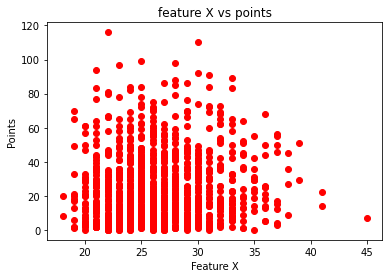

In [120]:
plt.scatter(X_test['Age'], y_test, color = "red")

plt.title("feature X vs points")
plt.xlabel("Feature X")
plt.ylabel("Points")
plt.show()

In [37]:
print("Coefficients: \n", reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination (R2): %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [-5.99893249e-16  5.66387215e-16  3.59272413e-16 -9.85878588e-17
  1.00000000e+00  1.00000000e+00 -2.82491417e-16 -1.22257347e-16
 -6.21425298e-16 -1.63045266e-15  9.75245254e-16  3.96018396e-16
  4.75197342e-16 -3.20923843e-17 -4.42517117e-16  4.94450401e-16
 -1.42478809e-15 -1.95007898e-14  4.00038181e-15 -1.51012422e-16
 -9.67108338e-17]
Mean squared error: 0.00
Coefficient of determination (R2): 1.00


## Take 2

#### Age

In [166]:
X = np.array(data['Age']).reshape(-1, 1)
y = np.array(data['PTS'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=69)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print("Train R2:", reg.score(X_train, y_train))
print("Test R2:", reg.score(X_test, y_test))
print("Coefficients: \n", reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination (R2): %.4f" % r2_score(y_test, y_pred))

Train R2: 0.0002789262101754453
Test R2: 0.002060013212680789
Coefficients: 
 [0.07791544]
Mean squared error: 410.53
Coefficient of determination (R2): 0.0021


(0.0, 125.0)

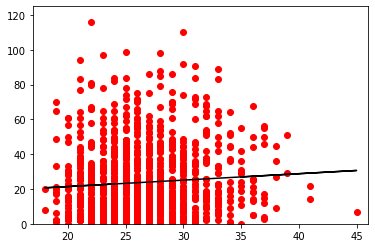

In [167]:
X_test = X_test.reshape(-1)
coef = np.polyfit(X_test,y_test,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y

plt.plot(X_test,y_test, 'ro', X_test, poly1d_fn(X_test), '-k') #'--k'=black dashed line, 'yo' = yellow circle marker

plt.xlim(17, 46)
plt.ylim(0, 125)

#### Team

In [159]:
X = np.array(data['Team']).reshape(-1, 1)
y = np.array(data['PTS'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=69)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print("Train R2:", reg.score(X_train, y_train))
print("Test R2:", reg.score(X_test, y_test))
print("Coefficients: \n", reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination (R2): %.2f" % r2_score(y_test, y_pred))

Train R2: 0.0005950160175359764
Test R2: 0.0023816924761748126
Coefficients: 
 [0.05426912]
Mean squared error: 410.40
Coefficient of determination (R2): 0.00


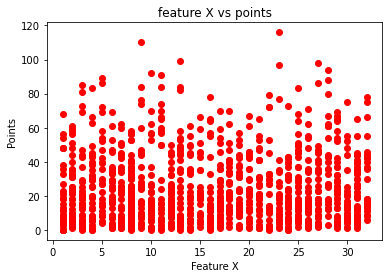

In [160]:
plt.scatter(X_test, y_test, color = "red")

plt.title("feature X vs points")
plt.xlabel("Feature X")
plt.ylabel("Points")
plt.show()

(0.0, 125.0)

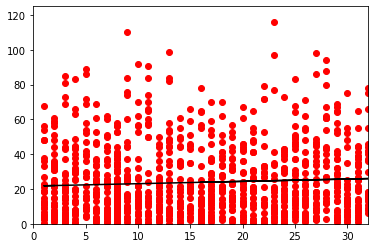

In [161]:
X_test = X_test.reshape(-1)
coef = np.polyfit(X_test,y_test,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y

plt.plot(X_test,y_test, 'ro', X_test, poly1d_fn(X_test), '-k') #'--k'=black dashed line, 'yo' = yellow circle marker

plt.xlim(0, 32)
plt.ylim(0, 125)

#### Position

In [154]:
X = np.array(data['Position']).reshape(-1, 1)
y = np.array(data['PTS'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=69)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print("Train R2:", reg.score(X_train, y_train))
print("Test R2:", reg.score(X_test, y_test))
print("Coefficients: \n", reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination (R2): %.2f" % r2_score(y_test, y_pred))

Train R2: 0.03779885439220543
Test R2: 0.05049087289583187
Coefficients: 
 [-3.31953701]
Mean squared error: 390.61
Coefficient of determination (R2): 0.05


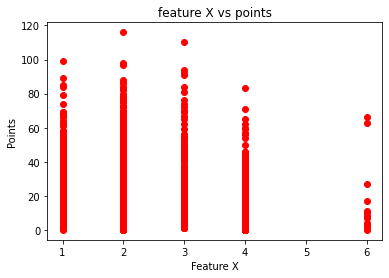

In [155]:
plt.scatter(X_test, y_test, color = "red")

plt.title("feature X vs points")
plt.xlabel("Feature X")
plt.ylabel("Points")
plt.show()

(0.0, 125.0)

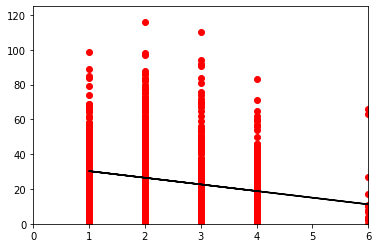

In [157]:
X_test = X_test.reshape(-1)
coef = np.polyfit(X_test,y_test,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y

plt.plot(X_test,y_test, 'ro', X_test, poly1d_fn(X_test), '-k') #'--k'=black dashed line, 'yo' = yellow circle marker

plt.xlim(0, 6)
plt.ylim(0, 125)

#### Pts per Game

In [170]:
X = np.array(data['Pts per Game']).reshape(-1, 1)
y = np.array(data['PTS'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=69)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print("Train R2:", reg.score(X_train, y_train))
print("Test R2:", reg.score(X_test, y_test))
print("Slope of Line: %.2f" % reg.coef_)
print("Y-intercept: %.2f" % reg.intercept_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination (R2): %.2f" % r2_score(y_test, y_pred))

Train R2: 0.850528972154836
Test R2: 0.854662535058669
Slope of Line: 71.05
Y-intercept: -4.19
Mean squared error: 59.79
Coefficient of determination (R2): 0.85


Slope of Line: 71.05
Y-intercept: -4.19


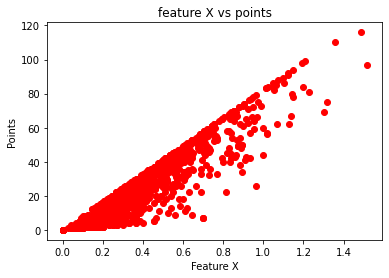

In [171]:
plt.scatter(X_test, y_test, color = "red")

print("Slope of Line: %.2f" % reg.coef_)
print("Y-intercept: %.2f" % reg.intercept_)

plt.title("feature X vs points")
plt.xlabel("Feature X")
plt.ylabel("Points")
plt.show()

In [126]:
print("Slope of Line: %.2f" % reg.coef_)
print("Y-intercept: %.2f" % reg.intercept_)

Slope of Line: 71.05
Y-intercept: -4.19


Slope of Line: 71.05
Y-intercept: -4.19


(0.0, 125.0)

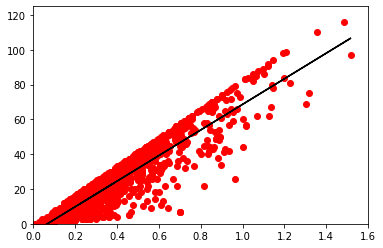

In [172]:
X_test = X_test.reshape(-1)
coef = np.polyfit(X_test,y_test,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y

print("Slope of Line: %.2f" % reg.coef_)
print("Y-intercept: %.2f" % reg.intercept_)

plt.plot(X_test,y_test, 'ro', X_test, poly1d_fn(X_test), '-k') #'--k'=black dashed line, 'yo' = yellow circle marker

plt.xlim(0, 1.6)
plt.ylim(0, 125)

#### Assists

In [174]:
X = np.array(data['Assists']).reshape(-1, 1)
y = np.array(data['PTS'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=69)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print("Train R2:", reg.score(X_train, y_train))
print("Test R2:", reg.score(X_test, y_test))
print("Coefficients: \n", reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination (R2): %.2f" % r2_score(y_test, y_pred))

Train R2: 0.9105726719140924
Test R2: 0.9071323688152775
Coefficients: 
 [1.47922962]
Mean squared error: 38.20
Coefficient of determination (R2): 0.91


Slope of Line: 1.48
Y-intercept: 1.63


(0.0, 125.0)

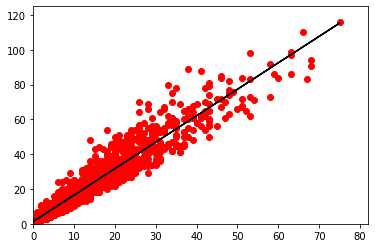

In [175]:
X_test = X_test.reshape(-1)
coef = np.polyfit(X_test,y_test,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y

print("Slope of Line: %.2f" % reg.coef_)
print("Y-intercept: %.2f" % reg.intercept_)

plt.plot(X_test,y_test, 'ro', X_test, poly1d_fn(X_test), '-k') #'--k'=black dashed line, 'yo' = yellow circle marker

plt.xlim(0, 82)
plt.ylim(0, 125)

#### Goals

In [176]:
X = np.array(data['Goals']).reshape(-1, 1)
y = np.array(data['PTS'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=69)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print("Train R2:", reg.score(X_train, y_train))
print("Test R2:", reg.score(X_test, y_test))
print("Coefficients: \n", reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination (R2): %.2f" % r2_score(y_test, y_pred))

Train R2: 0.7988391322913159
Test R2: 0.8166403424091884
Coefficients: 
 [2.07799537]
Mean squared error: 75.43
Coefficient of determination (R2): 0.82


Slope of Line: 2.08
Y-intercept: 5.46


(0.0, 125.0)

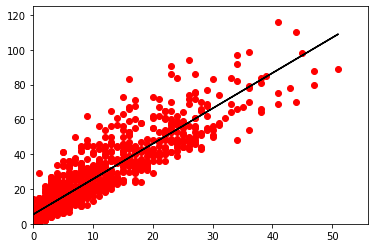

In [178]:
X_test = X_test.reshape(-1)
coef = np.polyfit(X_test,y_test,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y

print("Slope of Line: %.2f" % reg.coef_)
print("Y-intercept: %.2f" % reg.intercept_)

plt.plot(X_test,y_test, 'ro', X_test, poly1d_fn(X_test), '-k') #'--k'=black dashed line, 'yo' = yellow circle marker

plt.xlim(0, 56)
plt.ylim(0, 125)

#### P/60

In [182]:
X = np.array(data['P/60']).reshape(-1, 1)
y = np.array(data['PTS'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=69)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print("Train R2:", reg.score(X_train, y_train))
print("Test R2:", reg.score(X_test, y_test))
print("Coefficients: \n", reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination (R2): %.2f" % r2_score(y_test, y_pred))

Train R2: 0.6783434683348536
Test R2: 0.6765027640356654
Coefficients: 
 [21.0316528]
Mean squared error: 133.08
Coefficient of determination (R2): 0.68


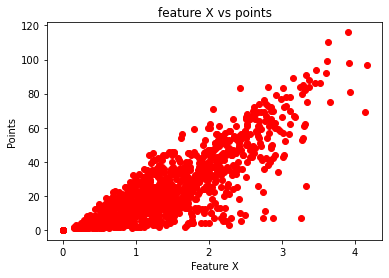

In [184]:
plt.scatter(X_test, y_test, color = "red")

plt.title("feature X vs points")
plt.xlabel("Feature X")
plt.ylabel("Points")
plt.show()

Slope of Line: 21.03
Y-intercept: -6.68


(-6.0, 125.0)

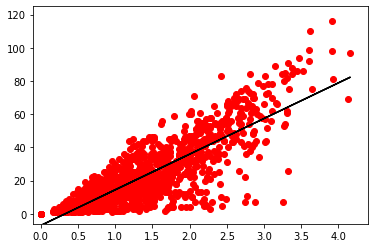

In [196]:
X_test = X_test.reshape(-1)
coef = np.polyfit(X_test,y_test,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y

print("Slope of Line: %.2f" % reg.coef_)
print("Y-intercept: %.2f" % reg.intercept_)

plt.plot(X_test,y_test, 'ro', X_test, poly1d_fn(X_test), '-k') #'--k'=black dashed line, 'yo' = yellow circle marker

plt.xlim(-0.1, 4.4)
plt.ylim(-6, 125)

#### Games Played

In [198]:
X = np.array(data['Games Played']).reshape(-1, 1)
y = np.array(data['PTS'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=69)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print("Train R2:", reg.score(X_train, y_train))
print("Test R2:", reg.score(X_test, y_test))
print("Coefficients: \n", reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination (R2): %.2f" % r2_score(y_test, y_pred))

Train R2: 0.4384253500238021
Test R2: 0.4723453226933998
Coefficients: 
 [0.61846026]
Mean squared error: 217.06
Coefficient of determination (R2): 0.47


Slope of Line: 0.62
Y-intercept: -9.96


(-8.0, 125.0)

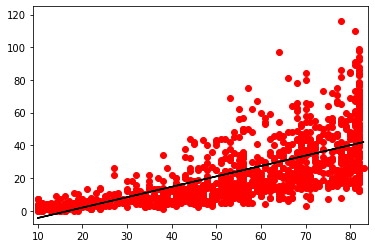

In [208]:
X_test = X_test.reshape(-1)
coef = np.polyfit(X_test,y_test,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y

print("Slope of Line: %.2f" % reg.coef_)
print("Y-intercept: %.2f" % reg.intercept_)

plt.plot(X_test,y_test, 'ro', X_test, poly1d_fn(X_test), '-k') #'--k'=black dashed line, 'yo' = yellow circle marker

plt.xlim(9, 84)
plt.ylim(-8, 125)

#### +/-

In [210]:
X = np.array(data['+/-']).reshape(-1, 1)
y = np.array(data['PTS'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=69)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print("Train R2:", reg.score(X_train, y_train))
print("Test R2:", reg.score(X_test, y_test))
print("Coefficients: \n", reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination (R2): %.2f" % r2_score(y_test, y_pred))

Train R2: 0.06770662857316845
Test R2: 0.03429481331985296
Coefficients: 
 [0.48361266]
Mean squared error: 397.27
Coefficient of determination (R2): 0.03


Slope of Line: 0.48
Y-intercept: 23.90


(-2.0, 125.0)

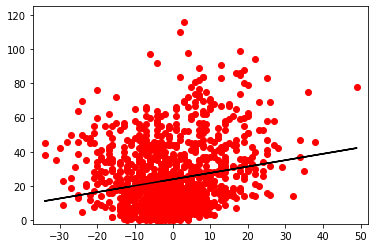

In [220]:
X_test = X_test.reshape(-1)
coef = np.polyfit(X_test,y_test,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y

print("Slope of Line: %.2f" % reg.coef_)
print("Y-intercept: %.2f" % reg.intercept_)

plt.plot(X_test,y_test, 'ro', X_test, poly1d_fn(X_test), '-k') #'--k'=black dashed line, 'yo' = yellow circle marker

plt.xlim(-37, 52)
plt.ylim(-2, 125)

#### PIM

In [221]:
X = np.array(data['PIM']).reshape(-1, 1)
y = np.array(data['PTS'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=69)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print("Train R2:", reg.score(X_train, y_train))
print("Test R2:", reg.score(X_test, y_test))
print("Coefficients: \n", reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination (R2): %.2f" % r2_score(y_test, y_pred))

Train R2: 0.08194880744198318
Test R2: 0.07885310147405367
Coefficients: 
 [0.27850021]
Mean squared error: 378.94
Coefficient of determination (R2): 0.08


Slope of Line: 0.28
Y-intercept: 16.78


(-3.0, 125.0)

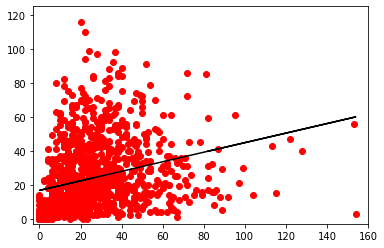

In [225]:
X_test = X_test.reshape(-1)
coef = np.polyfit(X_test,y_test,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y

print("Slope of Line: %.2f" % reg.coef_)
print("Y-intercept: %.2f" % reg.intercept_)

plt.plot(X_test,y_test, 'ro', X_test, poly1d_fn(X_test), '-k') #'--k'=black dashed line, 'yo' = yellow circle marker

plt.xlim(-3, 160)
plt.ylim(-3, 125)

#### Player Name

In [226]:
X = np.array(data['Unique ID']).reshape(-1, 1)
y = np.array(data['PTS'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=69)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print("Train R2:", reg.score(X_train, y_train))
print("Test R2:", reg.score(X_test, y_test))
print("Coefficients: \n", reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination (R2): %.2f" % r2_score(y_test, y_pred))

Train R2: 0.03181709634016916
Test R2: 0.042185453101174386
Coefficients: 
 [-0.01151633]
Mean squared error: 394.02
Coefficient of determination (R2): 0.04


Slope of Line: -0.01
Y-intercept: 29.54


(-3.0, 125.0)

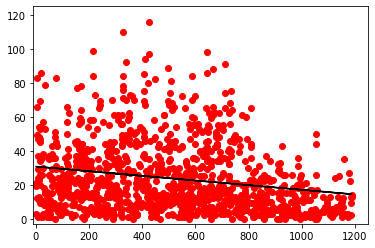

In [229]:
X_test = X_test.reshape(-1)
coef = np.polyfit(X_test,y_test,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y

print("Slope of Line: %.2f" % reg.coef_)
print("Y-intercept: %.2f" % reg.intercept_)

plt.plot(X_test,y_test, 'ro', X_test, poly1d_fn(X_test), '-k') #'--k'=black dashed line, 'yo' = yellow circle marker

plt.xlim(-10, 1250)
plt.ylim(-3, 125)

#### Shots on Goal

In [230]:
X = np.array(data['Shots']).reshape(-1, 1)
y = np.array(data['PTS'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=69)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print("Train R2:", reg.score(X_train, y_train))
print("Test R2:", reg.score(X_test, y_test))
print("Coefficients: \n", reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination (R2): %.2f" % r2_score(y_test, y_pred))

Train R2: 0.7844124097338554
Test R2: 0.7936433231692954
Coefficients: 
 [0.28357879]
Mean squared error: 84.89
Coefficient of determination (R2): 0.79


Slope of Line: 0.28
Y-intercept: -3.00


(-3.0, 125.0)

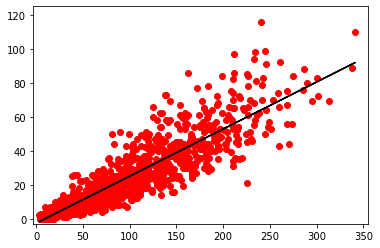

In [231]:
X_test = X_test.reshape(-1)
coef = np.polyfit(X_test,y_test,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y

print("Slope of Line: %.2f" % reg.coef_)
print("Y-intercept: %.2f" % reg.intercept_)

plt.plot(X_test,y_test, 'ro', X_test, poly1d_fn(X_test), '-k') #'--k'=black dashed line, 'yo' = yellow circle marker

plt.xlim(-3, 355)
plt.ylim(-3, 125)

#### Shooting %

In [232]:
X = np.array(data['S%']).reshape(-1, 1)
y = np.array(data['PTS'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=69)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print("Train R2:", reg.score(X_train, y_train))
print("Test R2:", reg.score(X_test, y_test))
print("Coefficients: \n", reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination (R2): %.2f" % r2_score(y_test, y_pred))

Train R2: 0.21323680041294912
Test R2: 0.24004798993270193
Coefficients: 
 [1.77891935]
Mean squared error: 312.63
Coefficient of determination (R2): 0.24


Slope of Line: 1.78
Y-intercept: 8.90


(-3.0, 125.0)

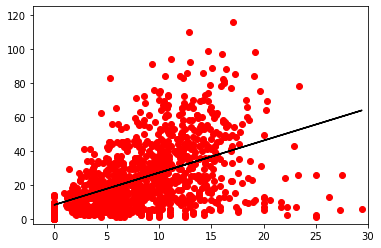

In [234]:
X_test = X_test.reshape(-1)
coef = np.polyfit(X_test,y_test,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y

print("Slope of Line: %.2f" % reg.coef_)
print("Y-intercept: %.2f" % reg.intercept_)

plt.plot(X_test,y_test, 'ro', X_test, poly1d_fn(X_test), '-k') #'--k'=black dashed line, 'yo' = yellow circle marker

plt.xlim(-2, 30)
plt.ylim(-3, 125)

#### Total TOI

In [235]:
X = np.array(data['TOI']).reshape(-1, 1)
y = np.array(data['PTS'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=69)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print("Train R2:", reg.score(X_train, y_train))
print("Test R2:", reg.score(X_test, y_test))
print("Coefficients: \n", reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination (R2): %.2f" % r2_score(y_test, y_pred))

Train R2: 0.5317873550453833
Test R2: 0.5458140864758712
Coefficients: 
 [0.03110024]
Mean squared error: 186.84
Coefficient of determination (R2): 0.55


Slope of Line: 0.03
Y-intercept: -4.31


(-3.0, 125.0)

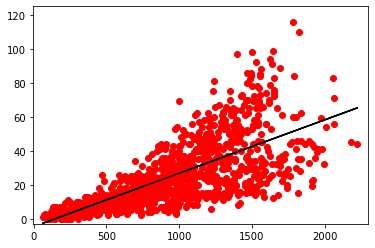

In [240]:
X_test = X_test.reshape(-1)
coef = np.polyfit(X_test,y_test,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y

print("Slope of Line: %.2f" % reg.coef_)
print("Y-intercept: %.2f" % reg.intercept_)

plt.plot(X_test,y_test, 'ro', X_test, poly1d_fn(X_test), '-k') #'--k'=black dashed line, 'yo' = yellow circle marker

plt.xlim(-3, 2300)
plt.ylim(-3, 125)

#### Average TOI

In [241]:
X = np.array(data['Avg TOI']).reshape(-1, 1)
y = np.array(data['PTS'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=69)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print("Train R2:", reg.score(X_train, y_train))
print("Test R2:", reg.score(X_test, y_test))
print("Coefficients: \n", reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination (R2): %.2f" % r2_score(y_test, y_pred))

Train R2: 0.3031317281565805
Test R2: 0.2804117457845777
Coefficients: 
 [2.75943948]
Mean squared error: 296.02
Coefficient of determination (R2): 0.28


Slope of Line: 2.76
Y-intercept: -19.94


(-3.0, 125.0)

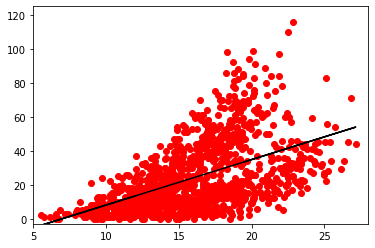

In [244]:
X_test = X_test.reshape(-1)
coef = np.polyfit(X_test,y_test,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y

print("Slope of Line: %.2f" % reg.coef_)
print("Y-intercept: %.2f" % reg.intercept_)

plt.plot(X_test,y_test, 'ro', X_test, poly1d_fn(X_test), '-k') #'--k'=black dashed line, 'yo' = yellow circle marker

plt.xlim(5, 28)
plt.ylim(-3, 125)

#### Shots Blocked

In [96]:
X = np.array(data['BLK']).reshape(-1, 1)
y = np.array(data['PTS'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=69)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print("Train R2:", reg.score(X_train, y_train))
print("Test R2:", reg.score(X_test, y_test))
print("Coefficients: \n", reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination (R2): %.2f" % r2_score(y_test, y_pred))

Train R2: 0.02749167217056292
Test R2: 0.01818918106702594
Coefficients: 
 [0.08950231]
Mean squared error: 403.89
Coefficient of determination (R2): 0.02


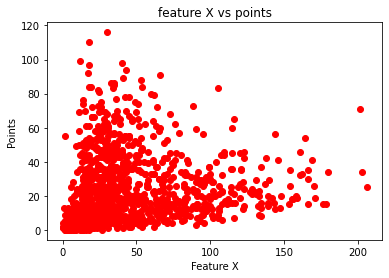

In [97]:
plt.scatter(X_test, y_test, color = "red")

plt.title("feature X vs points")
plt.xlabel("Feature X")
plt.ylabel("Points")
plt.show()

#### HITS

In [245]:
X = np.array(data['HIT']).reshape(-1, 1)
y = np.array(data['PTS'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=69)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print("Train R2:", reg.score(X_train, y_train))
print("Test R2:", reg.score(X_test, y_test))
print("Coefficients: \n", reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination (R2): %.2f" % r2_score(y_test, y_pred))

Train R2: 0.00866961380419562
Test R2: 0.009580381599616494
Coefficients: 
 [0.03794475]
Mean squared error: 407.43
Coefficient of determination (R2): 0.01


Slope of Line: 0.04
Y-intercept: 21.24


(-3.0, 125.0)

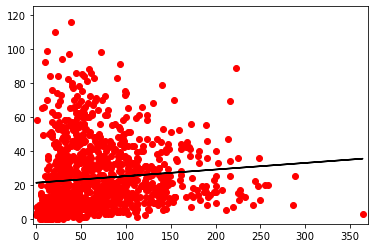

In [246]:
X_test = X_test.reshape(-1)
coef = np.polyfit(X_test,y_test,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y

print("Slope of Line: %.2f" % reg.coef_)
print("Y-intercept: %.2f" % reg.intercept_)

plt.plot(X_test,y_test, 'ro', X_test, poly1d_fn(X_test), '-k') #'--k'=black dashed line, 'yo' = yellow circle marker

plt.xlim(-3, 370)
plt.ylim(-3, 125)

# Random Forest

In [100]:
from sklearn.ensemble import RandomForestRegressor

## Rudimentary

In [101]:
X = data.drop(['PTS'], axis=1)
y = data['PTS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=420)

rfr = RandomForestRegressor(random_state=420)
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=420)

In [102]:
# Predict Test Results
y_pred = rfr.predict(X_test)

# Check accuracy
from sklearn.metrics import r2_score

print("Model accuracy score with 10 decision-trees: {0:0.4f}".format(r2_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees: 0.9960


In [103]:
feature_scores = pd.Series(rfr.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

Assists         0.811778
Pts per Game    0.087645
Goals           0.082187
Games Played    0.009506
TOI             0.004146
P/60            0.001197
Shots           0.000983
S%              0.000433
PPG             0.000321
Avg TOI         0.000236
+/-             0.000204
Unique ID       0.000188
PIM             0.000188
HIT             0.000175
BLK             0.000165
Team            0.000156
GWG             0.000152
Age             0.000142
Season          0.000111
Position        0.000054
SHG             0.000032
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

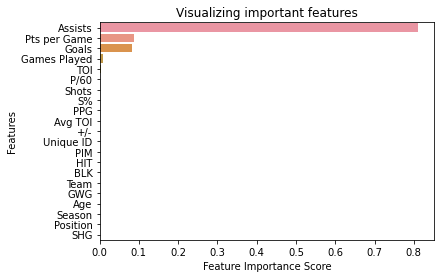

In [104]:
# Creating sns bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing important features")

plt.show

## Drop some features 

In [105]:
# Declare feature vector and target variable
X = data.drop(['SHG', 'Position','Age','GWG',"Team",'BLK','HIT','PTS', 'PIM', 'Shots','P/60','TOI', '+/-','Avg TOI','S%'], axis=1)

y = data['PTS']

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=421)

rfr = RandomForestRegressor(random_state=421)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

print("Model accuracy score with buncha stuff removed: {0:0.4f}".format(r2_score(y_test, y_pred)))

Model accuracy score with buncha stuff removed: 0.9992


In [107]:
feature_scores = pd.Series(rfr.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

Assists         0.808709
Goals           0.089267
Pts per Game    0.089074
Games Played    0.012075
Unique ID       0.000363
PPG             0.000340
Season          0.000172
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

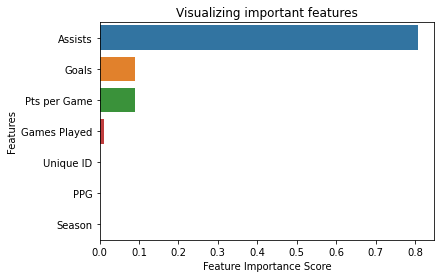

In [108]:
# Creating sns bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing important features")

plt.show

# LR on Test Set

In [260]:
data

,Unnamed: 0,index,Player,Age,Team,Position,Games Played,Goals,Assists,PTS,+/-,PIM,PPG,SHG,GWG,Shots,S%,TOI,BLK,HIT,Season,Pts per Game,P/60,Avg TOI
0,0,1,Justin Abdelkader\abdelju01,29,DET,LW,64,7,14,21,-20,50,5,0,1,104,6.7,1066,27.0,144,0,0.328,1.182,16.656
1,1,2,Pontus Aberg\abergpo01,23,NSH,LW,15,1,1,2,-2,4,0,0,0,12,8.3,185,2.0,9,0,0.133,0.649,12.333
2,2,3,Noel Acciari\acciano01,25,BOS,C,29,2,3,5,3,16,0,0,0,24,8.3,301,5.0,80,0,0.172,0.997,10.379
3,3,5,Sebastian Aho\ahose01,19,CAR,RW,82,24,25,49,-1,26,6,1,4,214,11.2,1377,14.0,51,0,0.598,2.135,16.793
4,4,6,Karl Alzner\alzneka01,28,WSH,D,82,3,10,13,23,28,0,0,0,81,3.7,1623,162.0,105,0,0.159,0.481,19.793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3721,3721,907,Trevor Zegras\zegratr01,19,ANA,C,24,3,10,13,6,12,0,0,0,53,5.7,370,4.0,7,4,0.542,2.108,15.417
3722,3722,908,Mika Zibanejad\zibanmi01,27,NYR,C,56,24,26,50,2,18,10,2,7,171,14.0,1126,44.0,75,4,0.893,2.664,20.107
3723,3723,910,Artem Zub\zubar01,25,OTT,D,47,3,11,14,4,26,0,0,1,39,7.7,864,70.0,89,4,0.298,0.972,18.383
3724,3724,911,Mats Zuccarello\zuccama01,33,MIN,LW,42,11,24,35,9,8,3,0,0,74,14.9,701,19.0,12,4,0.833,2.996,16.690


In [261]:
test

,Unnamed: 0,Player,Age,Team,Position,Games Played,Goals,Assists,PTS,+/-,PIM,PPG,SHG,GWG,Shots,S%,TOI,BLK,HIT,FOW,Season
0,0,Nicholas Abruzzese\abruzni01,22,TOR,C,9,1,0,1,-1,2,0,0,1,8,12.5,92,3,7,2,5
1,1,Noel Acciari\acciano01,30,FLA,C,20,3,5,8,2,11,0,0,1,32,9.4,240,16,48,84,5
2,2,Calen Addison\addisca01,21,MIN,D,15,2,2,4,-4,2,0,0,0,17,11.8,207,6,12,0,5
3,3,Andrew Agozzino\agozzan01,31,OTT,LW,1,0,0,0,0,0,0,0,0,1,0.0,7,0,4,1,5
4,4,Jack Ahcan\ahcanja01,24,BOS,D,6,1,0,1,-3,0,1,0,0,5,20.0,96,5,8,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,999,Mika Zibanejad\zibanmi01,28,NYR,C,81,29,52,81,30,12,15,1,3,219,13.2,1591,47,67,700,5
1000,1000,Radim Zohorna\zohorra01,25,PIT,F,17,2,4,6,12,4,0,0,0,9,22.2,176,3,23,4,5
1001,1001,Artem Zub\zubar01,26,OTT,D,81,6,16,22,1,60,0,0,0,92,6.5,1704,124,155,0,5
1002,1002,Mats Zuccarello\zuccama01,34,MIN,LW,70,24,55,79,21,24,7,0,2,159,15.1,1301,33,36,21,5


In [262]:
test = test.drop(columns=['FOW'])
data = data.drop(columns=['index', 'Unnamed: 0'])

In [264]:
test = test.drop(columns=['Unnamed: 0'])

In [265]:
test

,Player,Age,Team,Position,Games Played,Goals,Assists,PTS,+/-,PIM,PPG,SHG,GWG,Shots,S%,TOI,BLK,HIT,Season
0,Nicholas Abruzzese\abruzni01,22,TOR,C,9,1,0,1,-1,2,0,0,1,8,12.5,92,3,7,5
1,Noel Acciari\acciano01,30,FLA,C,20,3,5,8,2,11,0,0,1,32,9.4,240,16,48,5
2,Calen Addison\addisca01,21,MIN,D,15,2,2,4,-4,2,0,0,0,17,11.8,207,6,12,5
3,Andrew Agozzino\agozzan01,31,OTT,LW,1,0,0,0,0,0,0,0,0,1,0.0,7,0,4,5
4,Jack Ahcan\ahcanja01,24,BOS,D,6,1,0,1,-3,0,1,0,0,5,20.0,96,5,8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,Mika Zibanejad\zibanmi01,28,NYR,C,81,29,52,81,30,12,15,1,3,219,13.2,1591,47,67,5
1000,Radim Zohorna\zohorra01,25,PIT,F,17,2,4,6,12,4,0,0,0,9,22.2,176,3,23,5
1001,Artem Zub\zubar01,26,OTT,D,81,6,16,22,1,60,0,0,0,92,6.5,1704,124,155,5
1002,Mats Zuccarello\zuccama01,34,MIN,LW,70,24,55,79,21,24,7,0,2,159,15.1,1301,33,36,5


In [266]:
data

,Player,Age,Team,Position,Games Played,Goals,Assists,PTS,+/-,PIM,PPG,SHG,GWG,Shots,S%,TOI,BLK,HIT,Season,Pts per Game,P/60,Avg TOI
0,Justin Abdelkader\abdelju01,29,DET,LW,64,7,14,21,-20,50,5,0,1,104,6.7,1066,27.0,144,0,0.328,1.182,16.656
1,Pontus Aberg\abergpo01,23,NSH,LW,15,1,1,2,-2,4,0,0,0,12,8.3,185,2.0,9,0,0.133,0.649,12.333
2,Noel Acciari\acciano01,25,BOS,C,29,2,3,5,3,16,0,0,0,24,8.3,301,5.0,80,0,0.172,0.997,10.379
3,Sebastian Aho\ahose01,19,CAR,RW,82,24,25,49,-1,26,6,1,4,214,11.2,1377,14.0,51,0,0.598,2.135,16.793
4,Karl Alzner\alzneka01,28,WSH,D,82,3,10,13,23,28,0,0,0,81,3.7,1623,162.0,105,0,0.159,0.481,19.793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3721,Trevor Zegras\zegratr01,19,ANA,C,24,3,10,13,6,12,0,0,0,53,5.7,370,4.0,7,4,0.542,2.108,15.417
3722,Mika Zibanejad\zibanmi01,27,NYR,C,56,24,26,50,2,18,10,2,7,171,14.0,1126,44.0,75,4,0.893,2.664,20.107
3723,Artem Zub\zubar01,25,OTT,D,47,3,11,14,4,26,0,0,1,39,7.7,864,70.0,89,4,0.298,0.972,18.383
3724,Mats Zuccarello\zuccama01,33,MIN,LW,42,11,24,35,9,8,3,0,0,74,14.9,701,19.0,12,4,0.833,2.996,16.690


In [267]:
#def load_data():
 #   return pd.read_csv('C:/Users/seanl/OneDrive/Desktop/final_project/hockey_forecast/tables/good_tables/2016-17_skaters_2.csv')

def remove_rows(df):
    """ 
    remove rows without enough data (games played < 10)
    """
    df = df[df['Games Played'] > 9]    # play with this -- initially setting to 10 because of rookie contract cutoffs, maybe increase to 20 (25% of season) for sample size 
    return df

def points_per_game(df, n):
    # simple points per game 
    #df['Pts per Game'] = round(df[f'PTS {n}']/df['Games Played'], 3)
    df['Pts per Game'] = round(df['PTS']/df['Games Played'], 3)
    return df

def points_per_60(df, n):
    # calculating points per 60 mins -- player production that isn't dependent on TOI bottleneck 
    df['P/60'] = round(df['PTS'] * 60 / df['TOI'], 3)    
    return df

def avg_toi(df):
    df['Avg TOI'] = round(df['TOI']/df['Games Played'], 3)
    return df

In [268]:
test = (
    test
    .pipe(remove_rows)
    .pipe(points_per_game, 0)
    .pipe(points_per_60, 0)
    .pipe(avg_toi)
)
test

,Player,Age,Team,Position,Games Played,Goals,Assists,PTS,+/-,PIM,PPG,SHG,GWG,Shots,S%,TOI,BLK,HIT,Season,Pts per Game,P/60,Avg TOI
1,Noel Acciari\acciano01,30,FLA,C,20,3,5,8,2,11,0,0,1,32,9.4,240,16,48,5,0.400,2.000,12.000
2,Calen Addison\addisca01,21,MIN,D,15,2,2,4,-4,2,0,0,0,17,11.8,207,6,12,5,0.267,1.159,13.800
5,Sebastian Aho\ahose01,24,CAR,F,79,37,44,81,18,38,13,1,9,221,16.7,1497,23,76,5,1.025,3.246,18.949
6,Sebastian Aho\ahose02,25,NYI,D,36,2,10,12,-6,10,0,0,0,34,5.9,592,42,32,5,0.333,1.216,16.444
9,Michael Amadio\amadimi01,25,TOT,C,56,11,7,18,1,15,0,0,2,64,17.2,681,16,42,5,0.321,1.586,12.161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,Mika Zibanejad\zibanmi01,28,NYR,C,81,29,52,81,30,12,15,1,3,219,13.2,1591,47,67,5,1.000,3.055,19.642
1000,Radim Zohorna\zohorra01,25,PIT,F,17,2,4,6,12,4,0,0,0,9,22.2,176,3,23,5,0.353,2.045,10.353
1001,Artem Zub\zubar01,26,OTT,D,81,6,16,22,1,60,0,0,0,92,6.5,1704,124,155,5,0.272,0.775,21.037
1002,Mats Zuccarello\zuccama01,34,MIN,LW,70,24,55,79,21,24,7,0,2,159,15.1,1301,33,36,5,1.129,3.643,18.586


In [271]:
data.columns

Index(['Player', 'Age', 'Team', 'Position', 'Games Played', 'Goals', 'Assists',
       'PTS', '+/-', 'PIM', 'PPG', 'SHG', 'GWG', 'Shots', 'S%', 'TOI', 'BLK',
       'HIT', 'Season', 'Pts per Game', 'P/60', 'Avg TOI'],
      dtype='object')

In [272]:
test.columns

Index(['Player', 'Age', 'Team', 'Position', 'Games Played', 'Goals', 'Assists',
       'PTS', '+/-', 'PIM', 'PPG', 'SHG', 'GWG', 'Shots', 'S%', 'TOI', 'BLK',
       'HIT', 'Season', 'Pts per Game', 'P/60', 'Avg TOI'],
      dtype='object')

In [273]:
# Now we encode 'Team', 'Position'
encoder = ce.OrdinalEncoder(cols=['Team', 'Position'])

data = encoder.fit_transform(data)
test = encoder.fit_transform(test)

In [274]:
data = data.drop(columns=['Player'])
test = test.drop(columns=['Player'])

In [276]:
test.head(3)

,Age,Team,Position,Games Played,Goals,Assists,PTS,+/-,PIM,PPG,SHG,GWG,Shots,S%,TOI,BLK,HIT,Season,Pts per Game,P/60,Avg TOI
1,30,18.0,2,20,3,5,8,2,11,0,0,1,32,9.4,240,16,48,5,0.400,2.000,12.000
2,21,29.0,4,15,2,2,4,-4,2,0,0,0,17,11.8,207,6,12,5,0.267,1.159,13.800
5,24,4.0,6,79,37,44,81,18,38,13,1,9,221,16.7,1497,23,76,5,1.025,3.246,18.949


In [277]:
X = data.drop('PTS', axis=1)
y = np.array(test['PTS'])

reg = LinearRegression()
reg.fit(X, y)

#y_pred = reg.predict(X_test)

print("Accuracy score (R2):", reg.score(X, y))

ValueError: Found input variables with inconsistent numbers of samples: [3726, 808]